## SVM(Support Vector Machine)

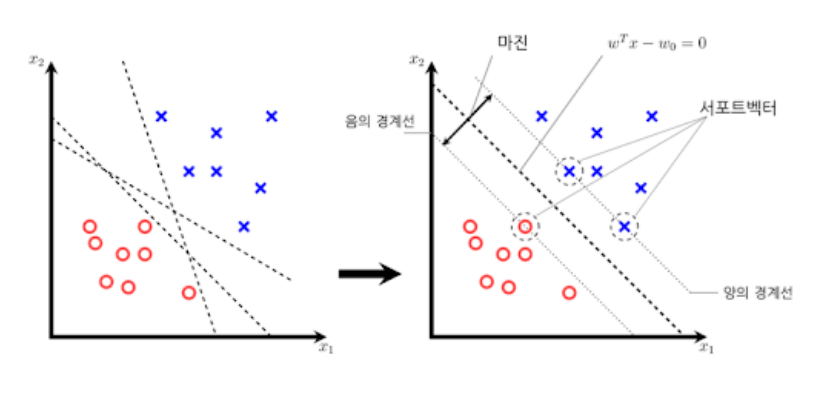

- 빨간원과 파란 x 중에 제일 가까운 2개를 선택하고 선택한 파란x와 평행한 x를 선택해서 선을 긋고 그 선과 평행되게 빨간원을 지나는 선을 긋고 그 두선의 가운데를 그으면 된다.

- Wine data

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

In [9]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
df.shape

(178, 14)

In [11]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

- 데이터 전처리
    - 표준화
    - 피쳐 값 범위의 차이가 너무 많이 난다.


In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wine_std = ss.fit_transform(wine.data)

- Train/Test dataset 분리

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)

- SVM 하이퍼 파라메터

In [18]:
from sklearn.svm import SVC
svc = SVC(random_state=2023)
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 2023,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
from sklearn.model_selection import GridSearchCV

params = {'C' : [0.01, 0.1, 1, 10, 100]}
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2023),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [20]:
grid_svc.best_params_

{'C': 0.1}

In [22]:
params = {'C' : [0.05, 0.08, 0.1, 0.3, 0.5]}
svc = SVC(random_state=2023)
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 0.5}

In [23]:
params = {'C' : [0.4, 0.5, 0.6, 0.8]}
svc = SVC(random_state=2023)
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 0.4}

In [24]:
best_svc = grid_svc.best_estimator_
best_svc.score(X_test, y_test)

0.9722222222222222

In [25]:
pred = best_svc.predict(X_test)
rf = pd.DataFrame({'y 실제값': y_test, 'y 예측값': pred})
rf.head()

,y 실제값,y 예측값
0,2,2
1,2,2
2,2,2
3,0,0
4,1,1


- predict_proba() method

In [26]:
svc2 = SVC(C=0.4, probability=True, random_state=2023)
svc2.fit(X_train, y_train)
svc2.predict_proba(X_test[:5])

array([[6.43871674e-03, 8.34390013e-03, 9.85217383e-01],
       [2.99411573e-02, 4.73705517e-02, 9.22688291e-01],
       [1.26387827e-02, 2.70042641e-02, 9.60356953e-01],
       [9.94398394e-01, 7.30926968e-04, 4.87067863e-03],
       [1.24037446e-02, 9.53643946e-01, 3.39523090e-02]])

#### Kaggle Red Wine Quilty dataset

In [27]:
rw = pd.read_csv('data/winequality-red.csv')
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
rw.shape

(1599, 12)

In [29]:
rw.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [30]:
# Good / Poor 2진 등급으로 분류(<- target의 갯수의 차이가 너무 큼)
rw['target'] = rw.quality.apply(lambda x: 1 if x >= 6 else 0)
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [31]:
# 결측치 체크
rw.isna().sum().sum()

0

In [32]:
X = rw.iloc[:, :-2].values
y = rw.target.values

In [33]:
# 표준화
X_std = StandardScaler().fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, stratify=y, test_size=0.2, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [35]:
svc = SVC(probability=True, random_state=2023)
params = {'C': [0.01, 0.1, 1, 10, 100]}
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1}

In [37]:
svc = SVC(probability=True, random_state=2023)
params = {'C': [0.5, 0.8, 1, 3, 5]}
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1}

In [38]:
svc = SVC(probability=True, random_state=2023)
params = {'C': [0.9, 0.95, 1, 1.5, 2]}
grid_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1}

In [39]:
best_svc = grid_svc.best_estimator_
best_svc.score(X_test, y_test)

0.790625

In [40]:
best_svc.predict(X_test[:5])

array([1, 1, 1, 0, 1], dtype=int64)

In [41]:
y_test[:5]

array([1, 1, 1, 0, 1], dtype=int64)

In [42]:
best_svc.predict_proba(X_test[:5])

array([[0.0399958 , 0.9600042 ],
       [0.13782246, 0.86217754],
       [0.46369644, 0.53630356],
       [0.56697554, 0.43302446],
       [0.28080769, 0.71919231]])